# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

# Reading the Dataset

In [2]:
df = pd.read_csv('Dataset.csv')

# Data Cleaning and Pre-Processing

### Removing unnecessary columns

The attributes after the column 'Benzene' are all NaN which are needed to removed from the dataset. The iloc function can thus be used to extract the columns till Benzene and ignore the rest of the columns.

In [3]:
df = df.iloc[:,0:11]

In [4]:
df

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  \
0     2018-01-01 00:00:00     216.880000    352.060000         NaN   
1     2018-01-02 00:00:00     165.310000    264.570000         NaN   
2     2018-01-03 00:00:00     168.470000    266.640000         NaN   
3     2018-01-04 00:00:00     186.840000    316.080000         NaN   
4     2018-01-05 00:00:00     193.990000    321.890000         NaN   
...                   ...            ...           ...         ...   
2186           2023-12-27     100.041667    268.697917         NaN   
2187           2023-12-28      81.010417    203.760417         NaN   
2188           2023-12-29      90.010417    244.562500         NaN   
2189           2023-12-30      89.270833    256.062500         NaN   
2190           2023-12-31      88.406250    255.583333         NaN   

      NO2 (µg/m³)  NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  \
0       58.490000        NaN    30.720000    18.910000    2.090000   
1       47.000000        NaN    26.910000    23.070000    1.760000   
2       47.720000        NaN    24.400000    19.490000    1.490000   
3       64.390000        NaN    23.870000    40.610000    1.460000   
4       61.560000        NaN    22.950000    42.160000    1.530000   
...           ...        ...          ...          ...         ...   
2186    12.989583        NaN     7.744792    73.335227    3.337535   
2187     9.989583        NaN     7.871875    91.518750    2.666736   
2188    12.010417        NaN     7.912500    78.415000    3.527813   
2189    15.170833        NaN     7.345833   131.893182    3.294306   
2190    14.238889        NaN     7.189583   134.477500    3.705278   

      Ozone (µg/m³)  Benzene (µg/m³)  
0         11.540000         1.690000  
1         13.450000         1.390000  
2         15.190000         1.290000  
3         11.050000         1.210000  
4         10.540000         1.000000  
...             ...              ...  
2186      31.412500         8.317708  
2187      35.943750         6.750347  
2188      36.582292         8.764236  
2189      30.011458         8.218403  
2190      21.094097         9.178125  

[2191 rows x 11 columns]

The NO and NOx columns are also NaN. So these attributes are of no use, and hence dropped using the drop function.

In [5]:
dropped_columns = ['NO (µg/m³)', 'NOx (ppb)']

df_new = df.drop(columns = dropped_columns, inplace = False)

In [6]:
df_new

Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  \
0     2018-01-01 00:00:00     216.880000    352.060000    58.490000   
1     2018-01-02 00:00:00     165.310000    264.570000    47.000000   
2     2018-01-03 00:00:00     168.470000    266.640000    47.720000   
3     2018-01-04 00:00:00     186.840000    316.080000    64.390000   
4     2018-01-05 00:00:00     193.990000    321.890000    61.560000   
...                   ...            ...           ...          ...   
2186           2023-12-27     100.041667    268.697917    12.989583   
2187           2023-12-28      81.010417    203.760417     9.989583   
2188           2023-12-29      90.010417    244.562500    12.010417   
2189           2023-12-30      89.270833    256.062500    15.170833   
2190           2023-12-31      88.406250    255.583333    14.238889   

      NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  
0       30.720000    18.910000    2.090000      11.540000         1.690000  
1       26.910000    23.070000    1.760000      13.450000         1.390000  
2       24.400000    19.490000    1.490000      15.190000         1.290000  
3       23.870000    40.610000    1.460000      11.050000         1.210000  
4       22.950000    42.160000    1.530000      10.540000         1.000000  
...           ...          ...         ...            ...              ...  
2186     7.744792    73.335227    3.337535      31.412500         8.317708  
2187     7.871875    91.518750    2.666736      35.943750         6.750347  
2188     7.912500    78.415000    3.527813      36.582292         8.764236  
2189     7.345833   131.893182    3.294306      30.011458         8.218403  
2190     7.189583   134.477500    3.705278      21.094097         9.178125  

[2191 rows x 9 columns]

In [7]:
df_new.to_csv('Air_Quality_Dataset.csv', index=False)

### Checking for missing values and corresponding imputation

In [8]:
missing_values = df_new.isnull().sum()
print(missing_values)

Timestamp           0
PM2.5 (µg/m³)       7
PM10 (µg/m³)       57
NO2 (µg/m³)         8
NH3 (µg/m³)         8
SO2 (µg/m³)        35
CO (mg/m³)         44
Ozone (µg/m³)       7
Benzene (µg/m³)    59
dtype: int64


In [9]:
df_new = pd.read_csv('Air_Quality_Dataset.csv', parse_dates=['Timestamp'], index_col='Timestamp')
df_new

PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  NH3 (µg/m³)  \
Timestamp                                                           
2018-01-01     216.880000    352.060000    58.490000    30.720000   
2018-01-02     165.310000    264.570000    47.000000    26.910000   
2018-01-03     168.470000    266.640000    47.720000    24.400000   
2018-01-04     186.840000    316.080000    64.390000    23.870000   
2018-01-05     193.990000    321.890000    61.560000    22.950000   
...                   ...           ...          ...          ...   
2023-12-27     100.041667    268.697917    12.989583     7.744792   
2023-12-28      81.010417    203.760417     9.989583     7.871875   
2023-12-29      90.010417    244.562500    12.010417     7.912500   
2023-12-30      89.270833    256.062500    15.170833     7.345833   
2023-12-31      88.406250    255.583333    14.238889     7.189583   

            SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  
Timestamp                                                            
2018-01-01    18.910000    2.090000      11.540000         1.690000  
2018-01-02    23.070000    1.760000      13.450000         1.390000  
2018-01-03    19.490000    1.490000      15.190000         1.290000  
2018-01-04    40.610000    1.460000      11.050000         1.210000  
2018-01-05    42.160000    1.530000      10.540000         1.000000  
...                 ...         ...            ...              ...  
2023-12-27    73.335227    3.337535      31.412500         8.317708  
2023-12-28    91.518750    2.666736      35.943750         6.750347  
2023-12-29    78.415000    3.527813      36.582292         8.764236  
2023-12-30   131.893182    3.294306      30.011458         8.218403  
2023-12-31   134.477500    3.705278      21.094097         9.178125  

[2191 rows x 8 columns]

In [10]:
df_imputed = df_new.interpolate(method='linear') #Using linear interpolation to fill in the missing values.
df_imputed.head()

PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  NH3 (µg/m³)  \
Timestamp                                                           
2018-01-01         216.88        352.06        58.49        30.72   
2018-01-02         165.31        264.57        47.00        26.91   
2018-01-03         168.47        266.64        47.72        24.40   
2018-01-04         186.84        316.08        64.39        23.87   
2018-01-05         193.99        321.89        61.56        22.95   

            SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  
Timestamp                                                            
2018-01-01        18.91        2.09          11.54             1.69  
2018-01-02        23.07        1.76          13.45             1.39  
2018-01-03        19.49        1.49          15.19             1.29  
2018-01-04        40.61        1.46          11.05             1.21  
2018-01-05        42.16        1.53          10.54             1.00

In [11]:
missing_values_new = df_imputed.isnull().sum()
print(missing_values_new)

PM2.5 (µg/m³)      0
PM10 (µg/m³)       0
NO2 (µg/m³)        0
NH3 (µg/m³)        0
SO2 (µg/m³)        0
CO (mg/m³)         0
Ozone (µg/m³)      0
Benzene (µg/m³)    0
dtype: int64


### Checking for duplicate rows

In [12]:
duplicated = df_imputed.duplicated().sum()
print(duplicated)

0


In [13]:
print("Data types:\n", df_imputed.dtypes)

Data types:
 PM2.5 (µg/m³)      float64
PM10 (µg/m³)       float64
NO2 (µg/m³)        float64
NH3 (µg/m³)        float64
SO2 (µg/m³)        float64
CO (mg/m³)         float64
Ozone (µg/m³)      float64
Benzene (µg/m³)    float64
dtype: object


In [14]:
df_imputed

PM2.5 (µg/m³)  PM10 (µg/m³)  NO2 (µg/m³)  NH3 (µg/m³)  \
Timestamp                                                           
2018-01-01     216.880000    352.060000    58.490000    30.720000   
2018-01-02     165.310000    264.570000    47.000000    26.910000   
2018-01-03     168.470000    266.640000    47.720000    24.400000   
2018-01-04     186.840000    316.080000    64.390000    23.870000   
2018-01-05     193.990000    321.890000    61.560000    22.950000   
...                   ...           ...          ...          ...   
2023-12-27     100.041667    268.697917    12.989583     7.744792   
2023-12-28      81.010417    203.760417     9.989583     7.871875   
2023-12-29      90.010417    244.562500    12.010417     7.912500   
2023-12-30      89.270833    256.062500    15.170833     7.345833   
2023-12-31      88.406250    255.583333    14.238889     7.189583   

            SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  Benzene (µg/m³)  
Timestamp                                                            
2018-01-01    18.910000    2.090000      11.540000         1.690000  
2018-01-02    23.070000    1.760000      13.450000         1.390000  
2018-01-03    19.490000    1.490000      15.190000         1.290000  
2018-01-04    40.610000    1.460000      11.050000         1.210000  
2018-01-05    42.160000    1.530000      10.540000         1.000000  
...                 ...         ...            ...              ...  
2023-12-27    73.335227    3.337535      31.412500         8.317708  
2023-12-28    91.518750    2.666736      35.943750         6.750347  
2023-12-29    78.415000    3.527813      36.582292         8.764236  
2023-12-30   131.893182    3.294306      30.011458         8.218403  
2023-12-31   134.477500    3.705278      21.094097         9.178125  

[2191 rows x 8 columns]

### Performing Data Normalization

In [15]:

from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_imputed)


In [16]:
scaled_data

array([[0.21541149, 0.40583218, 0.22955209, ..., 0.54432497, 0.05527676,
        0.1510277 ],
       [0.16273582, 0.30101356, 0.18293574, ..., 0.45837893, 0.06979927,
        0.12421805],
       [0.16596358, 0.30349355, 0.18585686, ..., 0.38805943, 0.0830292 ,
        0.1152815 ],
       ...,
       [0.08582182, 0.2770433 , 0.04097865, ..., 0.91879256, 0.24568348,
        0.78322039],
       [0.08506638, 0.29082103, 0.05380085, ..., 0.85797741, 0.19572277,
        0.73444171],
       [0.08418326, 0.29024696, 0.05001983, ..., 0.96501207, 0.12792045,
        0.82020777]])

# Feature Engineering

### Temporal data transformation for supervised learning

In [17]:

#Setting the window size.
window_size = 30

# Now creating a function to apply the sliding window technique in order to transform the data into a format suitable for supervised learning.

def create_sequences(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        Y.append(data[i + window_size])
    return np.array(X), np.array(Y)

# Creating sequences for X and Y

X, Y = create_sequences(scaled_data, window_size)

# Reshaping X to make it suitable for input expected by LSTM [samples, time steps, features].
X = np.reshape(X, (X.shape[0], window_size, df_imputed.shape[1]))

# Model Training and Evaluation

### Performing train-test split of the dataset

In [18]:

# Splitting the dataset into train and test sets.

split_index = int(len(X) * 0.8)  # Using 80% of the data for training.
X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]


In [19]:
X.shape

(2161, 30, 8)

In [20]:
Y.shape

(2161, 8)

In [21]:
X

array([[[0.21541149, 0.40583218, 0.22955209, ..., 0.54432497,
         0.05527676, 0.1510277 ],
        [0.16273582, 0.30101356, 0.18293574, ..., 0.45837893,
         0.06979927, 0.12421805],
        [0.16596358, 0.30349355, 0.18585686, ..., 0.38805943,
         0.0830292 , 0.1152815 ],
        ...,
        [0.11504479, 0.28014329, 0.1633804 , ..., 0.32555321,
         0.1073601 , 0.0714924 ],
        [0.09848725, 0.24456079, 0.14528562, ..., 0.27867355,
         0.12986618, 0.05272565],
        [0.0891615 , 0.28631332, 0.124148  , ..., 0.23700274,
         0.16400547, 0.04915103]],

       [[0.16273582, 0.30101356, 0.18293574, ..., 0.45837893,
         0.06979927, 0.12421805],
        [0.16596358, 0.30349355, 0.18585686, ..., 0.38805943,
         0.0830292 , 0.1152815 ],
        [0.18472743, 0.36272584, 0.25348913, ..., 0.38024615,
         0.05155109, 0.10813226],
        ...,
        [0.09848725, 0.24456079, 0.14528562, ..., 0.27867355,
         0.12986618, 0.05272565],
        [0.0

In [22]:
Y

array([[0.05176658, 0.27051085, 0.1211863 , ..., 0.17710095, 0.19373479,
        0.02859696],
       [0.08713905, 0.27670484, 0.1447582 , ..., 0.263047  , 0.1147354 ,
        0.04915103],
       [0.11511629, 0.34438348, 0.17133236, ..., 0.28127798, 0.11732056,
        0.05719392],
       ...,
       [0.08582182, 0.2770433 , 0.04097865, ..., 0.91879256, 0.24568348,
        0.78322039],
       [0.08506638, 0.29082103, 0.05380085, ..., 0.85797741, 0.19572277,
        0.73444171],
       [0.08418326, 0.29024696, 0.05001983, ..., 0.96501207, 0.12792045,
        0.82020777]])

#### Checking the shape of all the split datasets

In [23]:
X_train.shape

(1728, 30, 8)

In [24]:
Y_train.shape

(1728, 8)

In [25]:
X_test.shape

(433, 30, 8)

In [26]:
Y_test.shape

(433, 8)

### Preparing the LSTM (Long Short Term Memory) Architecture for the training

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Defining the window size and the number of features.
window_size = 30
num_features = 8

# Defining the LSTM model.
model_LSTM = Sequential([LSTM(64, input_shape=(window_size, num_features)),

                        Dropout(0.2),  # using a dropout layer as well for regularization.

                        Dense(50, activation='relu'),

                        Dense(8, activation='linear')])

# Compiling the model.
model_LSTM.compile(optimizer= 'adam', loss='mean_squared_error', metrics=['mae'])

# Printing a summary of the model architecture.
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                18688     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3250      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 408       
Total params: 22,346
Trainable params: 22,346
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Using callbacks for early stopping of the model training.

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

#### Model Training

In [29]:
# Training the model.

model_LSTM.fit(X_train, Y_train, epochs=100, batch_size=30, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/100
58/58 [==============================] - 11s 30ms/step - loss: 0.0130 - mae: 0.0816 - val_loss: 0.0142 - val_mae: 0.0794
Epoch 2/100
58/58 [==============================] - 1s 11ms/step - loss: 0.0066 - mae: 0.0569 - val_loss: 0.0118 - val_mae: 0.0691
Epoch 3/100
58/58 [==============================] - 1s 12ms/step - loss: 0.0057 - mae: 0.0514 - val_loss: 0.0103 - val_mae: 0.0659
Epoch 4/100
58/58 [==============================] - 1s 12ms/step - loss: 0.0053 - mae: 0.0489 - val_loss: 0.0093 - val_mae: 0.0608
Epoch 5/100
58/58 [==============================] - 1s 11ms/step - loss: 0.0051 - mae: 0.0479 - val_loss: 0.0091 - val_mae: 0.0613
Epoch 6/100
58/58 [==============================] - 1s 12ms/step - loss: 0.0050 - mae: 0.0469 - val_loss: 0.0085 - val_mae: 0.0585
Epoch 7/100
58/58 [==============================] - 1s 11ms/step - loss: 0.0048 - mae: 0.0457 - val_loss: 0.0080 - val_mae: 0.0589
Epoch 8/100
58/58 [==============================] - 1s 11ms/step - loss: 0

#### Model Predictions

In [30]:
Pred = model_LSTM.predict(X_test)

#### Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, median_absolute_error

# Making a function for the evaluation of the model performance using several metrics used for regression tasks.

def evaluate_model(y_true, y_pred):

    # Calculating evaluation metrics.
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mdae = median_absolute_error(y_true, y_pred)

    # Creating a dictionary to store evaluation metrics.
    metrics_dict = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2,
        'Explained Variance Score': evs,
        'Median Absolute Error': mdae
    }

    return metrics_dict

In [32]:
# Evaluating the model.

evaluate_model(Y_test,Pred)

{'Mean Squared Error (MSE)': 0.006203748421527018,
 'Mean Absolute Error (MAE)': 0.049965641775386545,
 'R-squared (R2)': 0.6122312464845291,
 'Explained Variance Score': 0.6329298741219329,
 'Median Absolute Error': 0.03439081632815717}

In [33]:
# Inverse transforming the scaled predictions.
original_predictions = scaler.inverse_transform(Pred)

original_Y_test = scaler.inverse_transform(Y_test)
import pandas as pd

In [34]:
# Making a Comparison DataFrame for the True and Predicted Values.

# Flattening the multidimensional array for its conversion into pandas series.
pred_flat = original_predictions.ravel()
y_test_flat = original_Y_test.ravel()

# Converting the predictions and the true values into pandas series for better visualization.
pred_series = pd.Series(pred_flat, name='Predicted')
y_test_series = pd.Series(y_test_flat, name='Original')

# Concatenating the Series into a DataFrame.
comparison_df = pd.concat([y_test_series, pred_series], axis=1)

comparison_df.head(5)

Original   Predicted
0     81.81   63.840141
1    160.23  176.886353
2     68.05   78.294197
3     37.75   29.356207
4     11.33   21.894613

#### LSTM Model Result Visualization

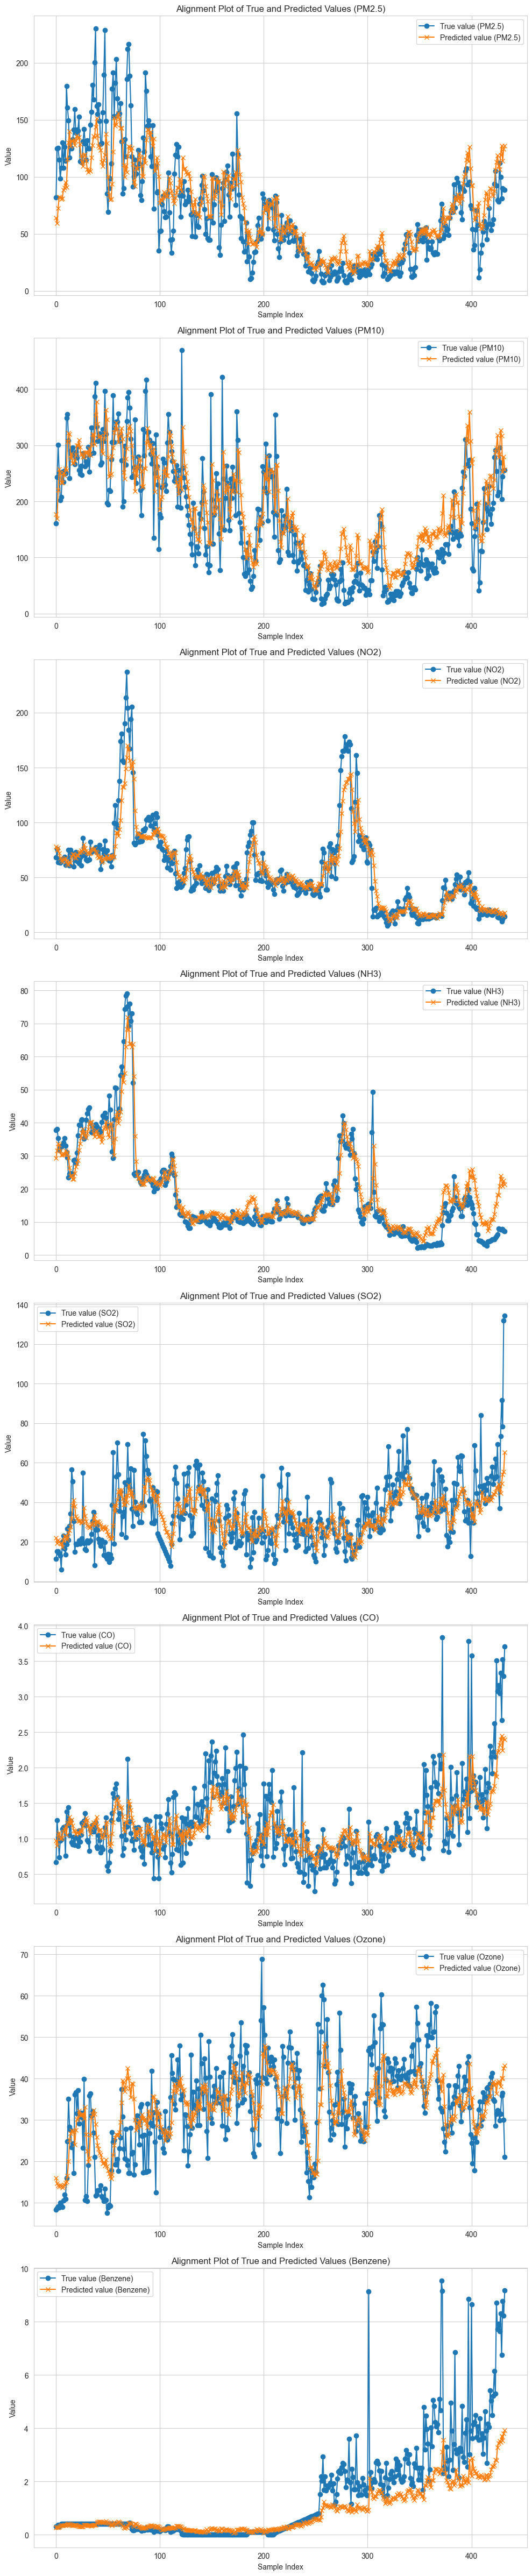

In [35]:
import matplotlib.pyplot as plt

num_attributes = original_Y_test.shape[1]
attribute_names = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene']

fig, axes = plt.subplots(num_attributes, 1, figsize=(10, 6*num_attributes))

for i, ax in enumerate(axes):
    ax.plot(original_Y_test[:, i], label=f'True value ({attribute_names[i]})', marker='o')
    ax.plot(original_predictions[:, i], label=f'Predicted value ({attribute_names[i]})', marker='x')
    ax.set_title(f'Alignment Plot of True and Predicted Values ({attribute_names[i]})')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


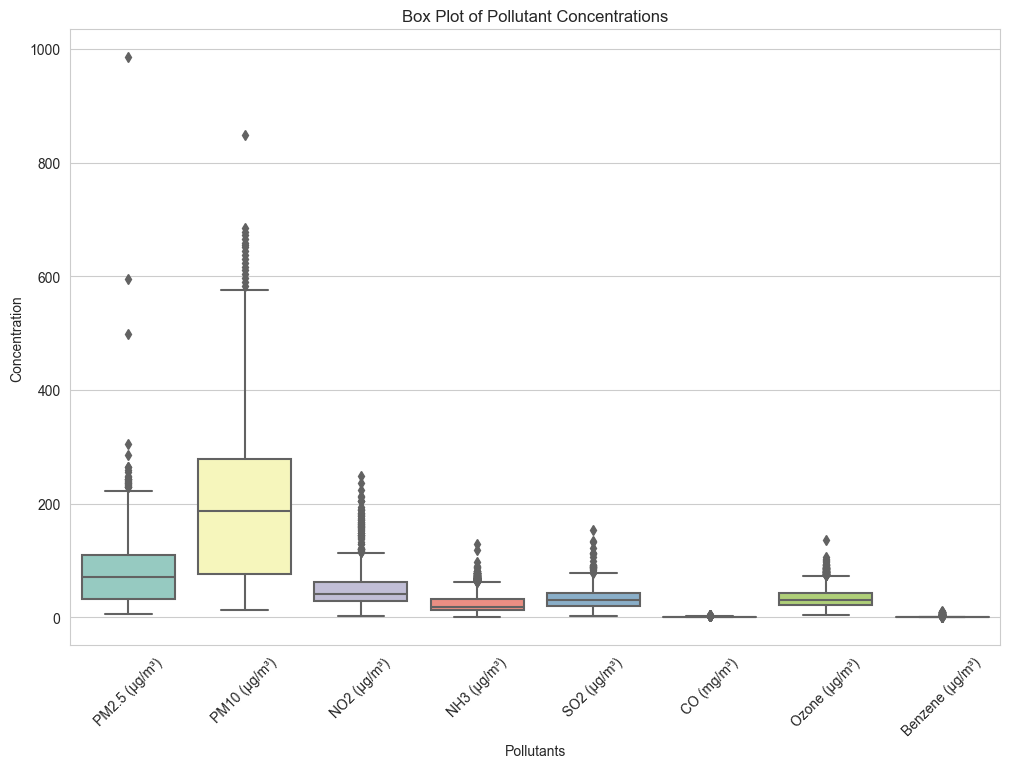

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Creating box plots for the pollutant concentrations.
sns.boxplot(data=df_imputed, palette='Set3')

plt.xlabel('Pollutants')
plt.ylabel('Concentration')
plt.title('Box Plot of Pollutant Concentrations')
plt.xticks(rotation=45)
plt.show()


#### Visualization of seasonal variations in the temporal data

In [37]:
# Dividing each year into four seasons namely spring, summer, autumn and winter and checking for variation in patterns for these specific time periods.

# Here we assume the winter range of any year to be extended till February of the next year.
# The winter range of the year 2023 is only till December of that year, due to the unavailability of 2024 data.

seasons = {
    2018: {
        'spring': ('2018-03-01', '2018-05-31'),
        'summer': ('2018-06-01', '2018-08-31'),
        'autumn': ('2018-09-01', '2018-11-30'),
        'winter': ('2018-12-01', '2019-02-28')
    },
    2019: {
        'spring': ('2019-03-01', '2019-05-31'),
        'summer': ('2019-06-01', '2019-08-31'),
        'autumn': ('2019-09-01', '2019-11-30'),
        'winter': ('2019-12-01', '2020-02-29')
    },
    2020: {
        'spring': ('2020-03-01', '2020-05-31'),
        'summer': ('2020-06-01', '2020-08-31'),
        'autumn': ('2020-09-01', '2020-11-30'),
        'winter': ('2020-12-01', '2021-02-28')
    },
    2021: {
        'spring': ('2021-03-01', '2021-05-31'),
        'summer': ('2021-06-01', '2021-08-31'),
        'autumn': ('2021-09-01', '2021-11-30'),
        'winter': ('2021-12-01', '2022-02-28')
    },
    2022: {
        'spring': ('2022-03-01', '2022-05-31'),
        'summer': ('2022-06-01', '2022-08-31'),
        'autumn': ('2022-09-01', '2022-11-30'),
        'winter': ('2022-12-01', '2023-02-28')
    },
    2023: {
        'spring': ('2023-03-01', '2023-05-31'),
        'summer': ('2023-06-01', '2023-08-31'),
        'autumn': ('2023-09-01', '2023-11-30'),
        'winter': ('2023-12-01', '2023-12-31')

    }
}


In [38]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Making a function that will return the pollutant name from the list of DataFrame columns based on the user input.

def get_pollutant_name(df):

    # Defining a list of pollutant names from DataFrame columns.
    pollutant_list = list(df.columns)

    # Extracting the first word from each pollutant name in the DataFrame columns.
    pollutant_first_word = [pollutant.split()[0] for pollutant in pollutant_list]

    # Prompt the user to input the pollutant name.
    default_pollutant = pollutant_first_word[0]  # Use the first word of the first pollutant.
    user_input = input("Enter any one of the pollutant name from the list --> [PM2.5, PM10, NO2, NH3, SO2, CO, Ozone, Benzene]".format(default_pollutant))

    # Extracting the user-defined first word.
    user_first_word = user_input.split()[0] if user_input else default_pollutant

    # Finding the corresponding full pollutant name based on the first word entered by the user.
    matching_pollutants = [pollutant for pollutant, first_word in zip(pollutant_list, pollutant_first_word) if first_word == user_first_word]

    if not matching_pollutants:
        print("Error: Pollutant name not found in the dataset.")
        return None
    else:

        return matching_pollutants[0]

# Defining colors for each season for easier visualization.
season_colors = {
    'spring': 'blue',
    'summer': 'green',
    'autumn': 'orange',
    'winter': 'red'
}

#### Performing seasonal decomposition

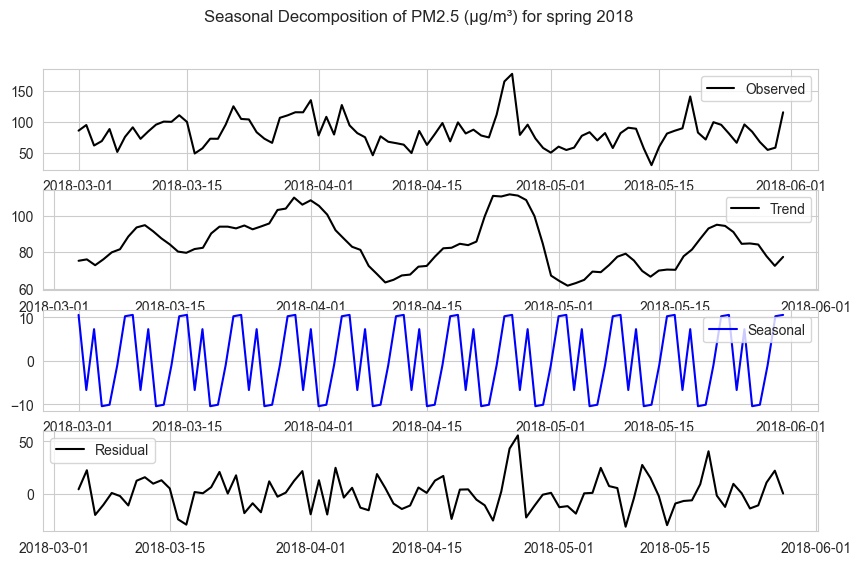

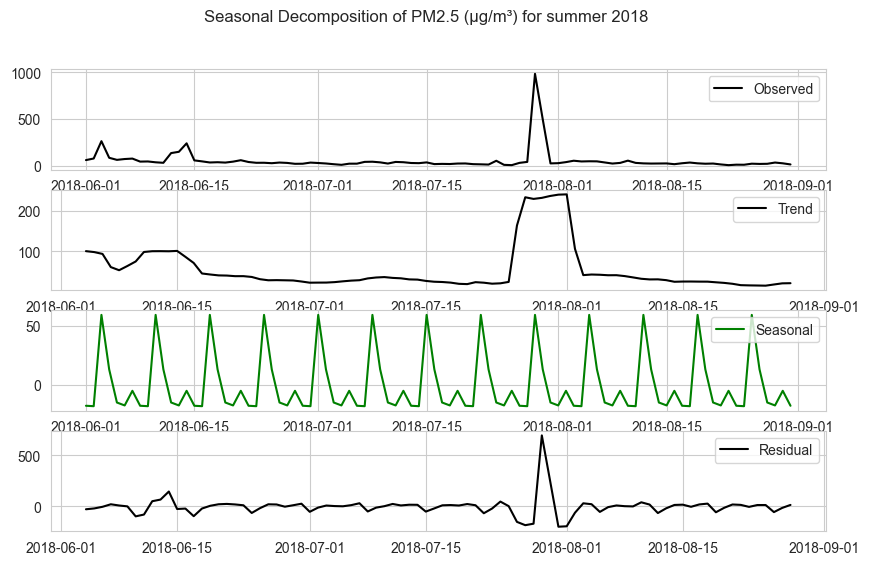

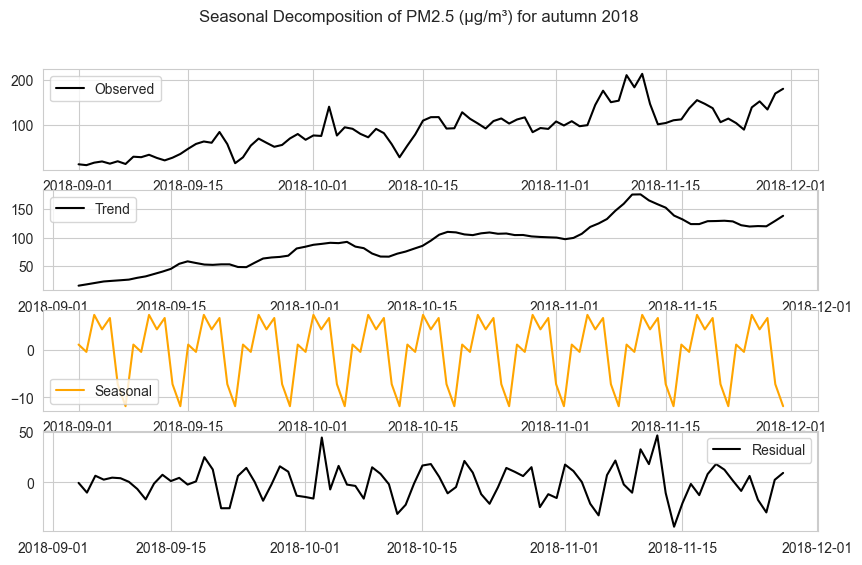

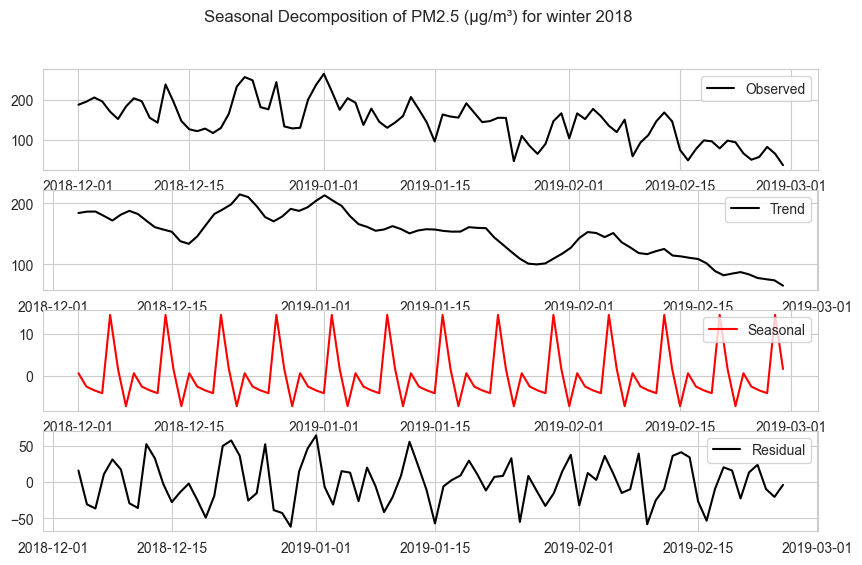

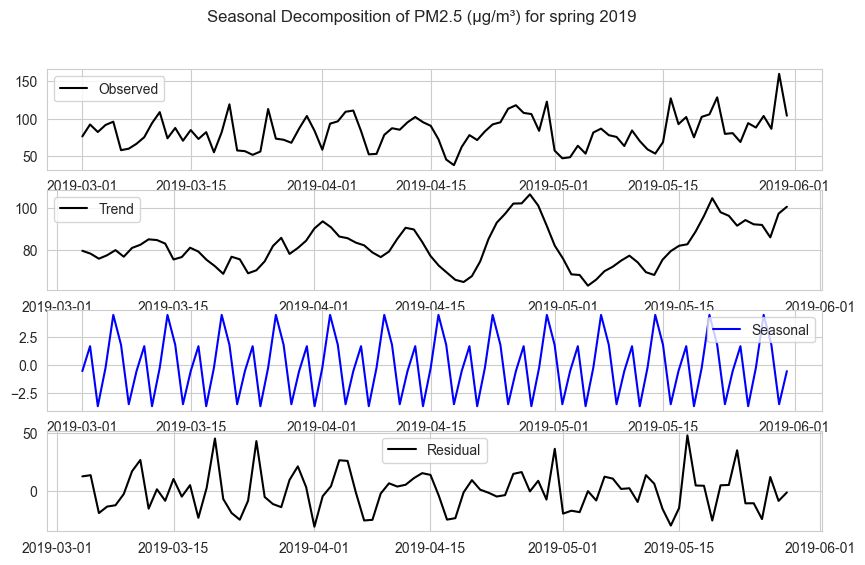

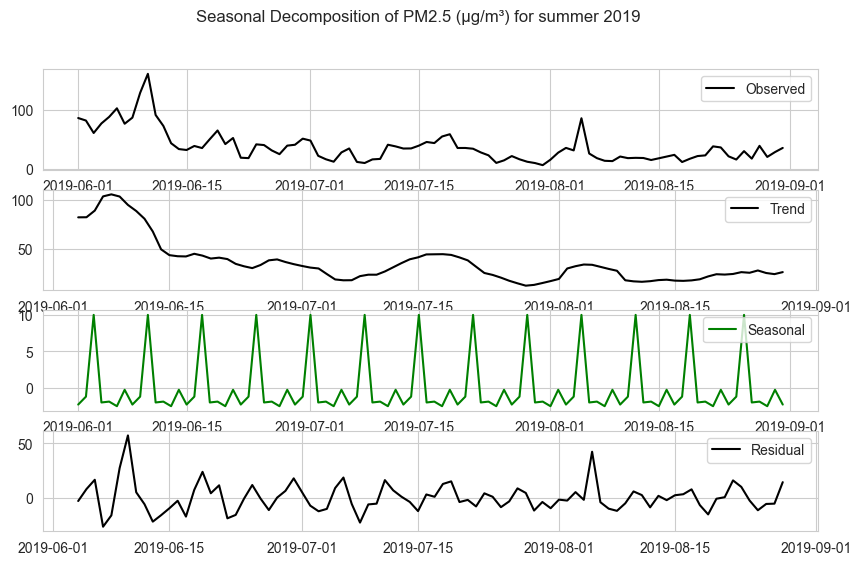

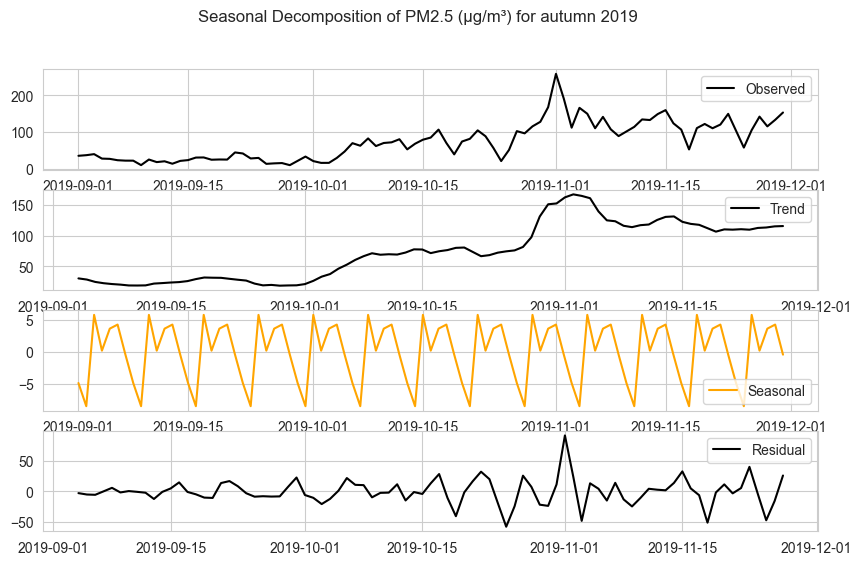

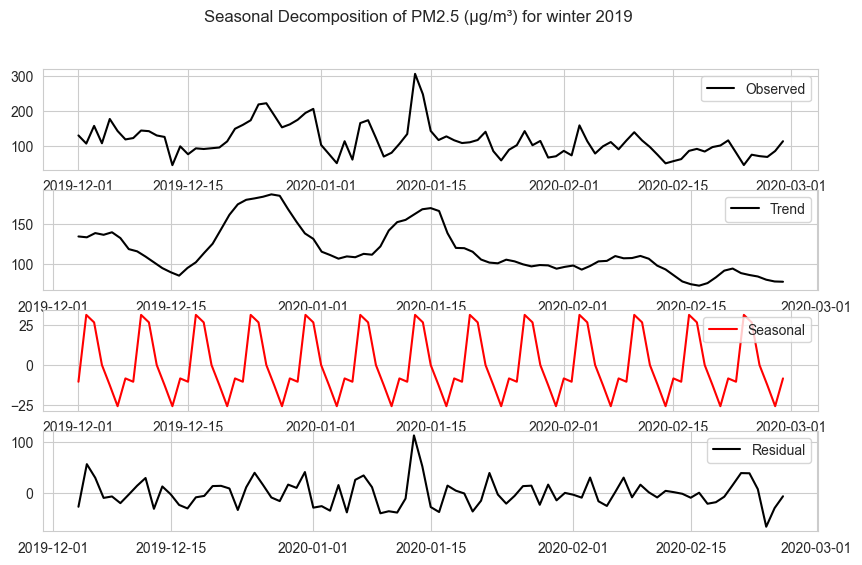

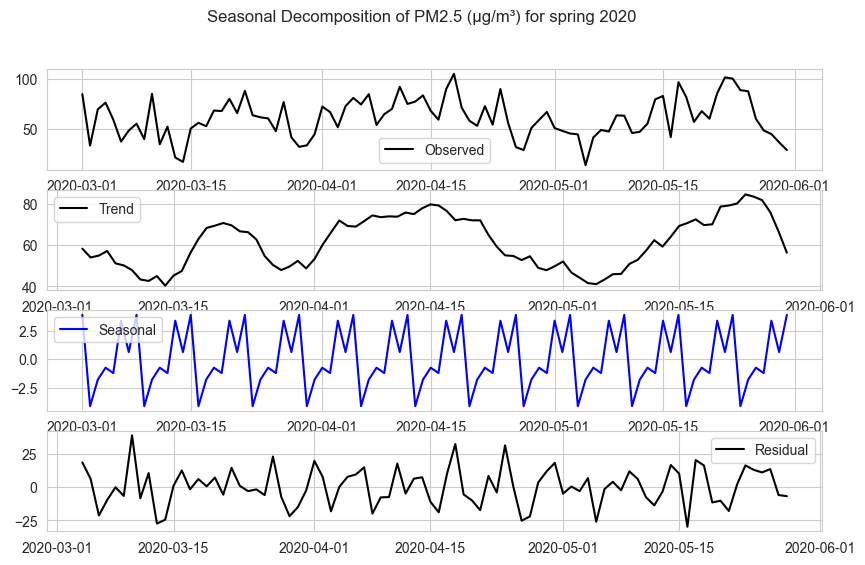

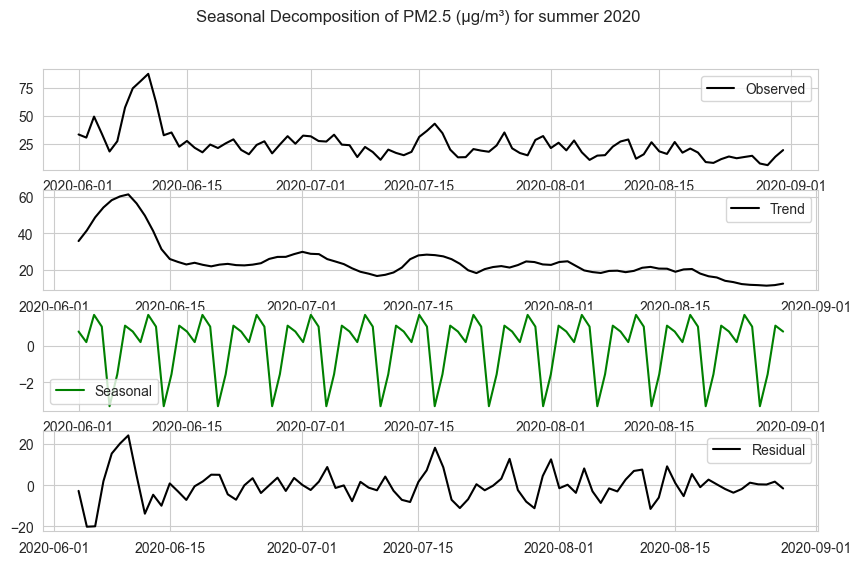

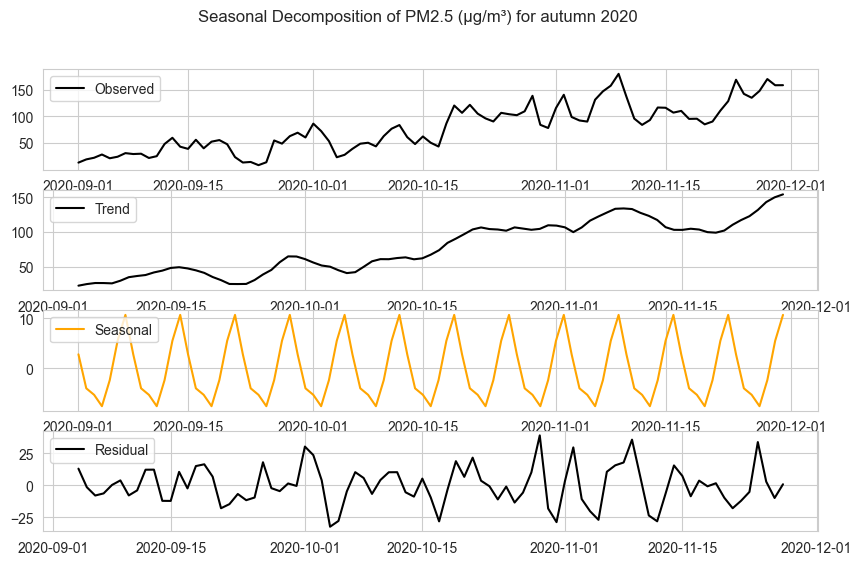

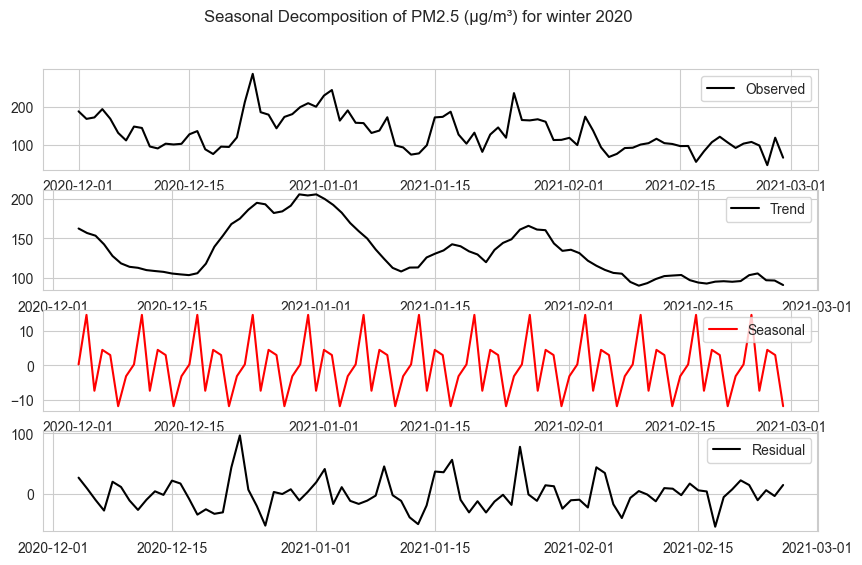

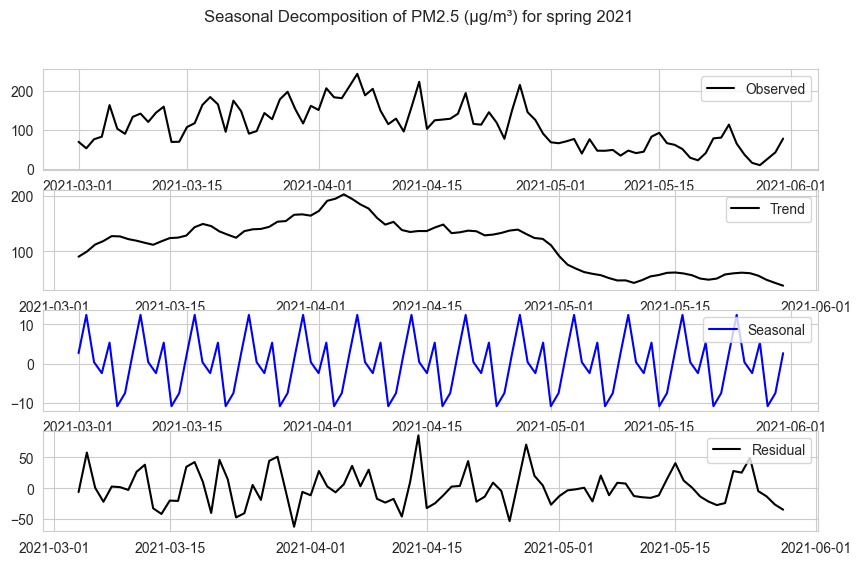

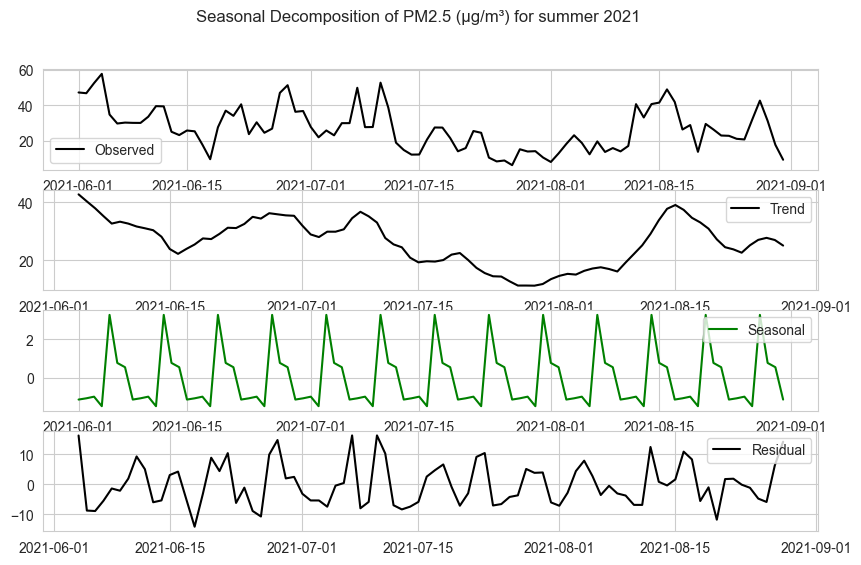

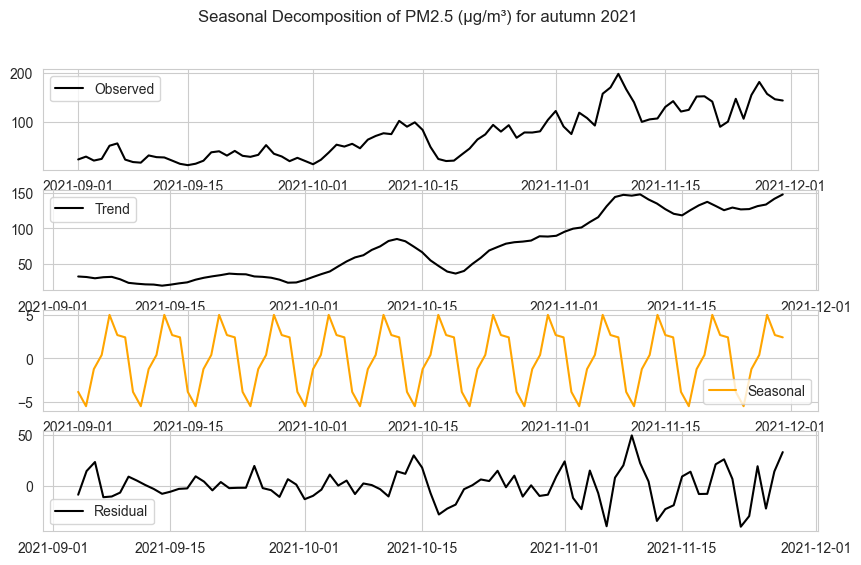

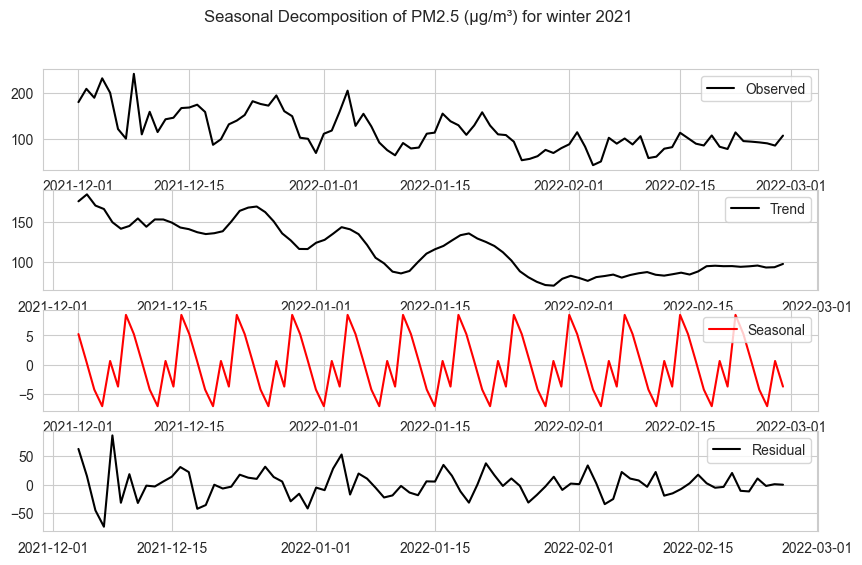

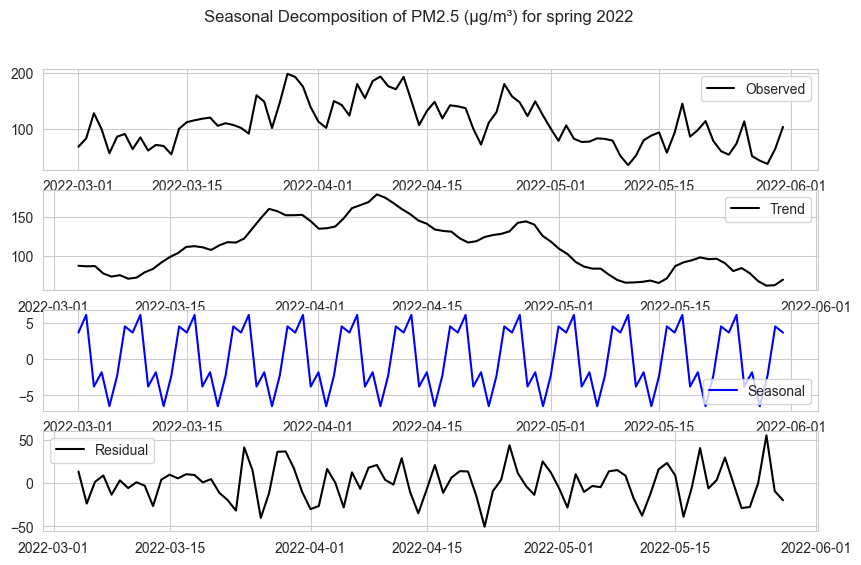

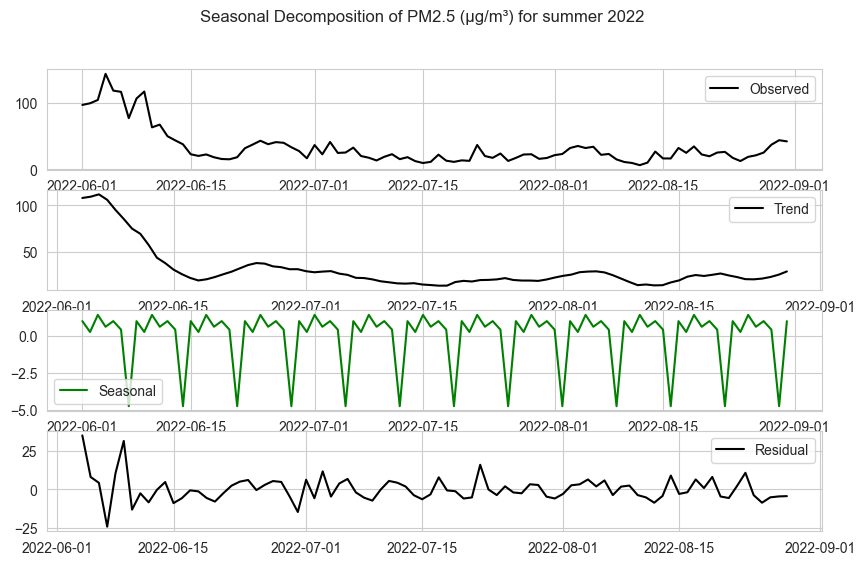

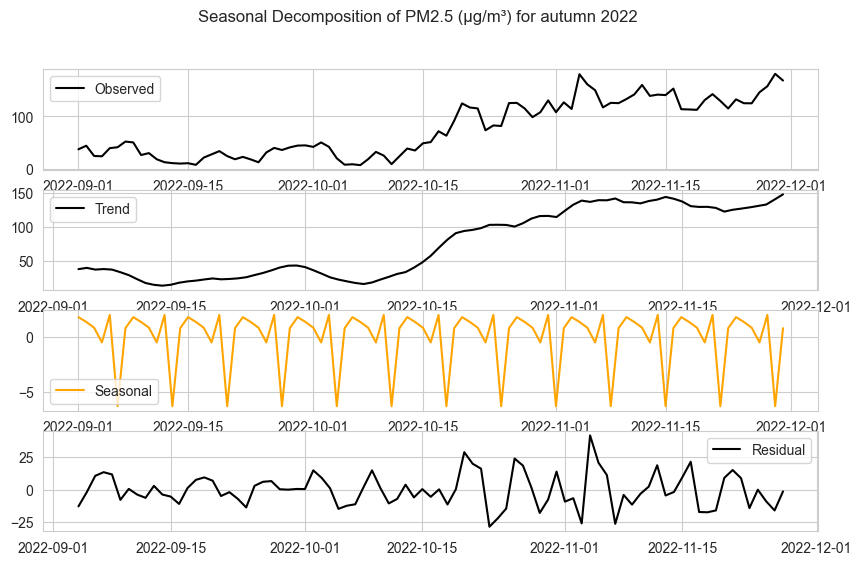

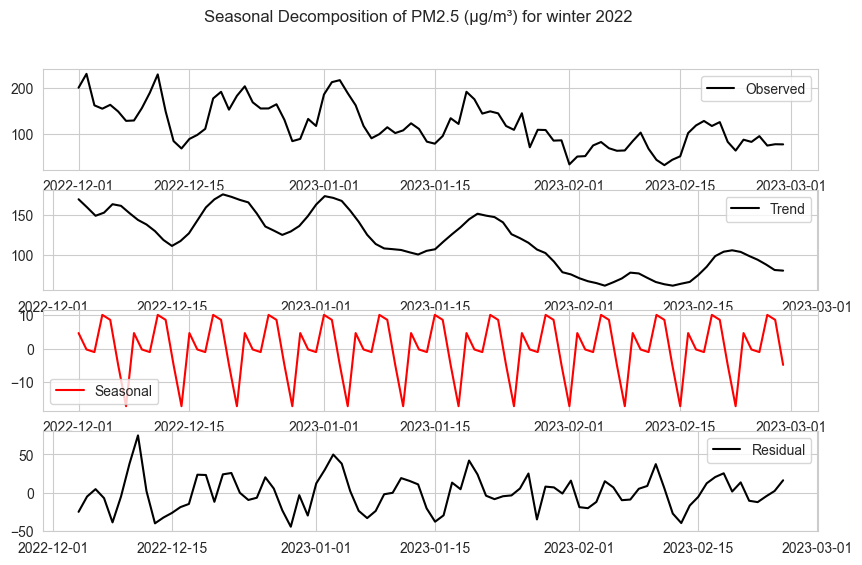

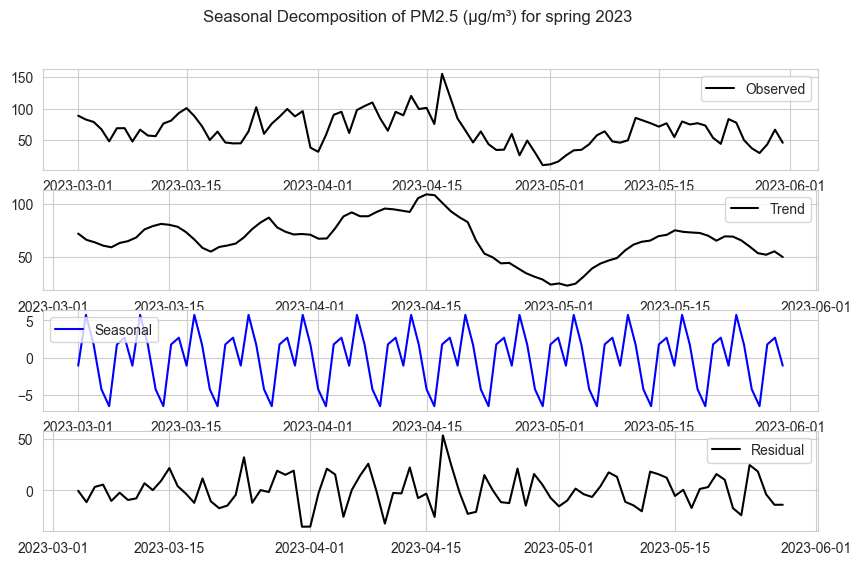

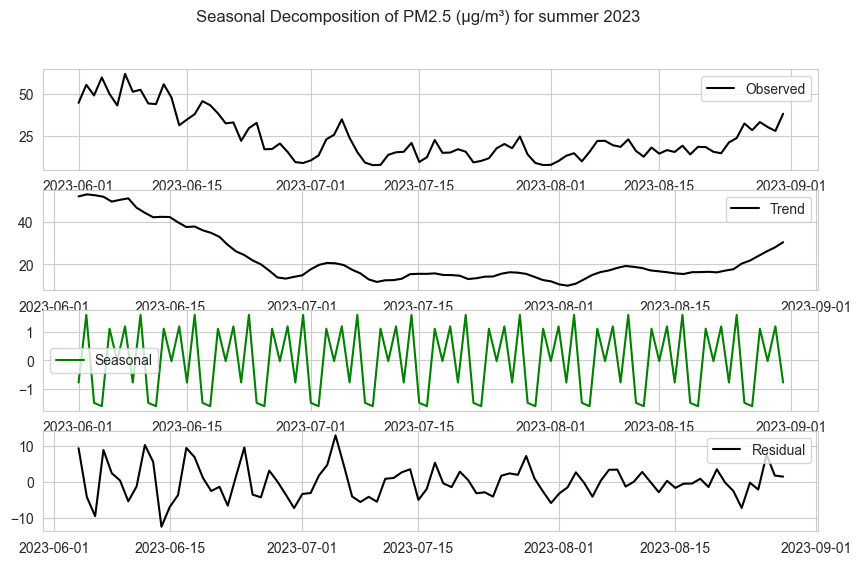

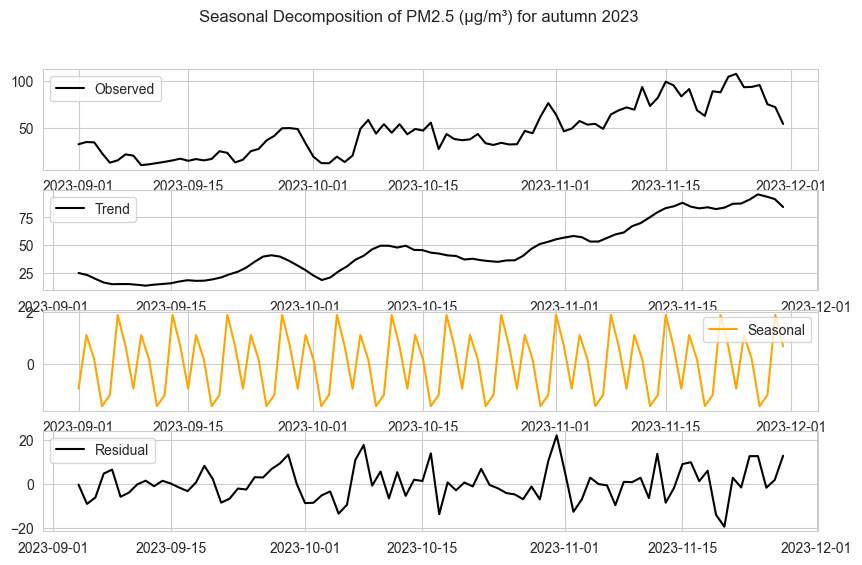

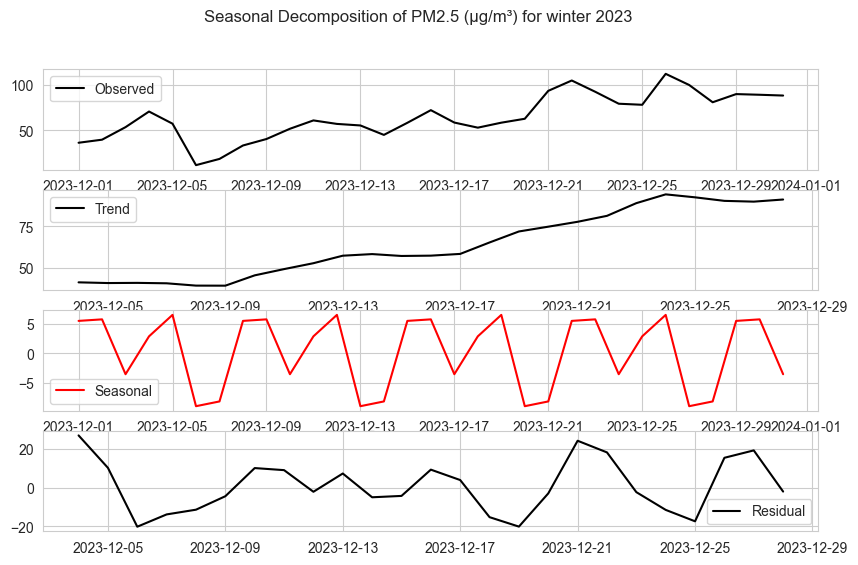

In [39]:
# Setting the datetime index frequency as D.
df_imputed = df_imputed.asfreq('D')

pollutant_name = get_pollutant_name(df_imputed)

# Iterating over each year.
for year in range(2018, 2024):
    # Iterating over each season in the year.
    for season, (start_date, end_date) in seasons[year].items():

        # Extracting data for the current season and year.
        season_data = df_imputed[start_date:end_date]

        season_data.index = pd.date_range(start=start_date, end=end_date, freq='D')

        # Extracting data for the specified pollutant.
        pollutant_data = season_data[pollutant_name]

        # Performing seasonal decomposition.
        decomposition = seasonal_decompose(pollutant_data, model='additive', period=None)

        # Plotting the decomposed components with different colors for each season.
        plt.figure(figsize=(10, 6))
        plt.subplot(411)
        plt.plot(decomposition.observed, label='Observed', color='black')
        plt.legend()
        plt.subplot(412)
        plt.plot(decomposition.trend, label='Trend', color='black')
        plt.legend()
        plt.subplot(413)
        plt.plot(decomposition.seasonal, label='Seasonal', color=season_colors[season])
        plt.legend()
        plt.subplot(414)
        plt.plot(decomposition.resid, label='Residual', color='black')
        plt.legend()
        plt.suptitle(f'Seasonal Decomposition of {pollutant_name} for {season} {year}')
        plt.show()

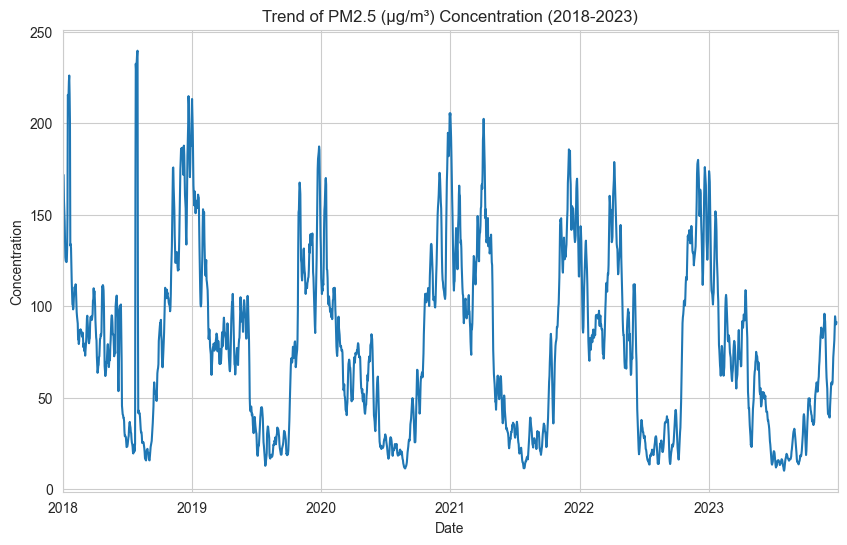

In [40]:
# Plotting trend of pollutants over the whole timeperiod of six years from 2018 to 2023.

from statsmodels.tsa.seasonal import seasonal_decompose

pollutant_name_all = get_pollutant_name(df_imputed)

pollutant_data_all = df_imputed[pollutant_name_all]

decomposition = seasonal_decompose(pollutant_data_all, model='additive')

# Extracting the trend component.
trend = decomposition.trend

# Plotting the trend component.
plt.figure(figsize=(10, 6))
trend.plot(title=f'Trend of {pollutant_name_all} Concentration (2018-2023)', xlabel='Date', ylabel='Concentration', grid=True)
plt.show()

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\User\\Documents\\UG Dataset\\Coding'